In [1]:
import tensorflow as tf
tf.test.is_gpu_available() # True/False

# Or only check for gpu's with cuda support
tf.test.is_gpu_available(cuda_only=True)

True

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv('INDUSINDBK.BO.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-01-14,10.15,10.35,10.15,10.30,7.528677,8600.0
1,2002-01-15,10.30,10.30,10.20,10.25,7.492130,5360.0
2,2002-01-16,10.30,10.35,10.20,10.35,7.565224,1190.0
3,2002-01-17,10.25,10.40,10.15,10.20,7.455584,6165.0
4,2002-01-18,10.50,10.50,10.05,10.35,7.565224,9861.0


In [5]:
df1 = df.reset_index()['High']

In [6]:
df2 = df.reset_index()['High']

In [7]:
df2.head()

0    10.35
1    10.30
2    10.35
3    10.40
4    10.50
Name: High, dtype: float64

In [8]:
df2.isnull().sum()

49

In [9]:
# making new data frame with dropped NA values 
df2 = df2.dropna(axis = 0, how ='any') 

In [10]:
df2.isnull().sum()

0

In [11]:
df1 = df2

In [12]:
df1.head()

0    10.35
1    10.30
2    10.35
3    10.40
4    10.50
Name: High, dtype: float64

In [13]:
df1.shape

(4558,)

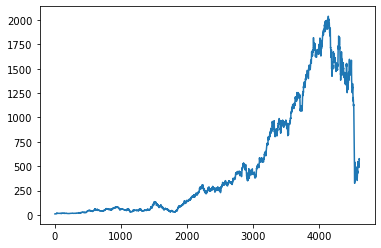

In [14]:
plt.plot(df1)

In [15]:
# LSTM are sensitive to the scale of the data. so we are applying MinMax scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0, 1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
df1

array([[2.46596959e-05],
       [0.00000000e+00],
       [2.46596959e-05],
       ...,
       [2.56214234e-01],
       [2.79887543e-01],
       [2.76040636e-01]])

In [17]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size,test_size

(2962, 1596)

In [19]:
train_data

array([[2.46596959e-05],
       [0.00000000e+00],
       [2.46596959e-05],
       ...,
       [1.99842176e-01],
       [2.00581966e-01],
       [2.02752017e-01]])

In [20]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [40]:
# reshape into X=t, t+1, t+2, t+3 and Y = t+4
time_step = 200
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [41]:
X_train.shape

(2761, 200)

In [42]:
print(X_test.shape), print(y_test.shape)

(1395, 200)
(1395,)


(None, None)

In [43]:
# Reshape input to be [sample, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [44]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [45]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 200, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 200, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [94]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Train on 2761 samples, validate on 1395 samples
Epoch 1/100
2761/2761 [==============================] - 6s 2ms/sample - loss: 9.4115e-06 - val_loss: 0.0013
Epoch 2/100
2761/2761 [==============================] - 6s 2ms/sample - loss: 9.1205e-06 - val_loss: 0.0023
Epoch 3/100
2761/2761 [==============================] - 6s 2ms/sample - loss: 1.2870e-05 - val_loss: 0.0010
Epoch 4/100
2761/2761 [==============================] - 5s 2ms/sample - loss: 9.0490e-06 - val_loss: 0.0016
Epoch 5/100
2761/2761 [==============================] - 5s 2ms/sample - loss: 7.5625e-06 - val_loss: 8.3201e-04
Epoch 6/100
2761/2761 [==============================] - 6s 2ms/sample - loss: 9.6627e-06 - val_loss: 6.2134e-04
Epoch 7/100
2761/2761 [==============================] - 6s 2ms/sample - loss: 8.0403e-06 - val_loss: 9.7557e-04
Epoch 8/100
2761/2761 [==============================] - 5s 2ms/sample - loss: 1.0927e-05 - val_loss: 4.3690e-04
Epoch 9/100
2761/2761 [==============================] - 5s 2ms/

InternalError:  [_Derived_]  Failed to call ThenRnnBackward with model config: [rnn_mode, rnn_input_mode, rnn_direction_mode]: 2, 0, 0 , [num_layers, input_size, num_units, dir_count, max_seq_length, batch_size, cell_num_units]: [1, 1, 50, 1, 200, 32, 50] 
	 [[{{node gradients/CudnnRNN_grad/CudnnRNNBackprop}}]]
	 [[StatefulPartitionedCall_2]] [Op:__inference_distributed_function_60847]

Function call stack:
distributed_function -> distributed_function -> distributed_function


In [48]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [49]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [51]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

205.97683589864374

In [52]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

1323.9618136954182

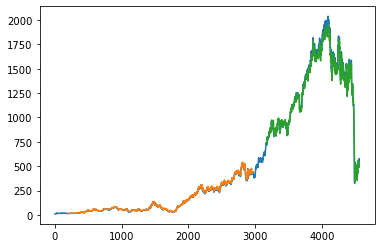

In [53]:
### Plotting 
# shift train predictions for plotting
# look_back=100
look_back = time_step
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [54]:
test_data.shape

(1596, 1)

In [58]:
1596-time_step

1396

In [60]:
x_input=test_data[1396:].reshape(1,-1)
x_input.shape

(1, 200)

In [61]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [63]:
temp_input

[0.6825557228342192,
 0.6776977745784443,
 0.6603373126612274,
 0.6526188761773265,
 0.7119993755730989,
 0.7583842877287321,
 0.7476573200119474,
 0.7453886398257412,
 0.7613434512368107,
 0.7569047059746928,
 0.7238114059126685,
 0.6921976880978771,
 0.6402643443645966,
 0.6323732416763871,
 0.6262083177012234,
 0.6458374598046465,
 0.6461826713807537,
 0.6133112849085269,
 0.6186624265891212,
 0.6243588405086743,
 0.6286249797361416,
 0.6580686329682152,
 0.6661570250602838,
 0.6643322317301374,
 0.6595235910295097,
 0.6591043278661947,
 0.629019498867396,
 0.6487719394503224,
 0.647736244059149,
 0.6577480445916587,
 0.6780183629550007,
 0.6821858273957094,
 0.6659104281012773,
 0.6622114737161792,
 0.6838873222463526,
 0.7117034715521389,
 0.7125172533535146,
 0.7159696107796062,
 0.6877589428357593,
 0.6795472517709934,
 0.675429094885432,
 0.6896577270902617,
 0.7238607134678157,
 0.7347849705884597,
 0.7149832229435801,
 0.7345629973221979,
 0.7450433680799761,
 0.7530084621857

In [64]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=time_step
i=0
while(i<30):
    
    if(len(temp_input)>time_step):
#         print(temp_input.shape)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.67769777 0.66033731 0.65261888 0.71199938 0.75838429 0.74765732
 0.74538864 0.76134345 0.75690471 0.72381141 0.69219769 0.64026434
 0.63237324 0.62620832 0.64583746 0.64618267 0.61331128 0.61866243
 0.62435884 0.62862498 0.65806863 0.66615703 0.66433223 0.65952359
 0.65910433 0.6290195  0.64877194 0.64773624 0.65774804 0.67801836
 0.68218583 0.66591043 0.66221147 0.68388732 0.71170347 0.71251725
 0.71596961 0.68775894 0.67954725 0.67542909 0.68965773 0.72386071
 0.73478497 0.71498322 0.734563   0.74504337 0.75300846 0.77229233
 0.77473368 0.7822302  0.77416649 0.76134345 0.75853227 0.74376108
 0.72731307 0.71520514 0.70149438 0.7101499  0.73175182 0.73796605
 0.73897712 0.73646184 0.73710296 0.73900174 0.73559875 0.75009861
 0.7492602  0.75443874 0.76050505 0.7502219  0.74632572 0.75098638
 0.75310714 0.74415566 0.73836063 0.725217   0.74260208 0.74506805
 0.75784179 0.77739694 0.71942197 0.69246891 0.67380153 0.67005327
 0.66085519 0.66009072 0.65579995 0.65826592 0.645

4 day output [[0.3009458]]
5 day input [0.74765732 0.74538864 0.76134345 0.75690471 0.72381141 0.69219769
 0.64026434 0.63237324 0.62620832 0.64583746 0.64618267 0.61331128
 0.61866243 0.62435884 0.62862498 0.65806863 0.66615703 0.66433223
 0.65952359 0.65910433 0.6290195  0.64877194 0.64773624 0.65774804
 0.67801836 0.68218583 0.66591043 0.66221147 0.68388732 0.71170347
 0.71251725 0.71596961 0.68775894 0.67954725 0.67542909 0.68965773
 0.72386071 0.73478497 0.71498322 0.734563   0.74504337 0.75300846
 0.77229233 0.77473368 0.7822302  0.77416649 0.76134345 0.75853227
 0.74376108 0.72731307 0.71520514 0.70149438 0.7101499  0.73175182
 0.73796605 0.73897712 0.73646184 0.73710296 0.73900174 0.73559875
 0.75009861 0.7492602  0.75443874 0.76050505 0.7502219  0.74632572
 0.75098638 0.75310714 0.74415566 0.73836063 0.725217   0.74260208
 0.74506805 0.75784179 0.77739694 0.71942197 0.69246891 0.67380153
 0.67005327 0.66085519 0.66009072 0.65579995 0.65826592 0.64544288
 0.62862498 0.62453145 

10 day output [[0.3301392]]
11 day input [0.64026434 0.63237324 0.62620832 0.64583746 0.64618267 0.61331128
 0.61866243 0.62435884 0.62862498 0.65806863 0.66615703 0.66433223
 0.65952359 0.65910433 0.6290195  0.64877194 0.64773624 0.65774804
 0.67801836 0.68218583 0.66591043 0.66221147 0.68388732 0.71170347
 0.71251725 0.71596961 0.68775894 0.67954725 0.67542909 0.68965773
 0.72386071 0.73478497 0.71498322 0.734563   0.74504337 0.75300846
 0.77229233 0.77473368 0.7822302  0.77416649 0.76134345 0.75853227
 0.74376108 0.72731307 0.71520514 0.70149438 0.7101499  0.73175182
 0.73796605 0.73897712 0.73646184 0.73710296 0.73900174 0.73559875
 0.75009861 0.7492602  0.75443874 0.76050505 0.7502219  0.74632572
 0.75098638 0.75310714 0.74415566 0.73836063 0.725217   0.74260208
 0.74506805 0.75784179 0.77739694 0.71942197 0.69246891 0.67380153
 0.67005327 0.66085519 0.66009072 0.65579995 0.65826592 0.64544288
 0.62862498 0.62453145 0.61326198 0.62201617 0.62019138 0.62818109
 0.63099227 0.6557999

 0.34799397 0.35226762]
16 day output [[0.35649216]]
17 day input [0.61866243 0.62435884 0.62862498 0.65806863 0.66615703 0.66433223
 0.65952359 0.65910433 0.6290195  0.64877194 0.64773624 0.65774804
 0.67801836 0.68218583 0.66591043 0.66221147 0.68388732 0.71170347
 0.71251725 0.71596961 0.68775894 0.67954725 0.67542909 0.68965773
 0.72386071 0.73478497 0.71498322 0.734563   0.74504337 0.75300846
 0.77229233 0.77473368 0.7822302  0.77416649 0.76134345 0.75853227
 0.74376108 0.72731307 0.71520514 0.70149438 0.7101499  0.73175182
 0.73796605 0.73897712 0.73646184 0.73710296 0.73900174 0.73559875
 0.75009861 0.7492602  0.75443874 0.76050505 0.7502219  0.74632572
 0.75098638 0.75310714 0.74415566 0.73836063 0.725217   0.74260208
 0.74506805 0.75784179 0.77739694 0.71942197 0.69246891 0.67380153
 0.67005327 0.66085519 0.66009072 0.65579995 0.65826592 0.64544288
 0.62862498 0.62453145 0.61326198 0.62201617 0.62019138 0.62818109
 0.63099227 0.65579995 0.65873443 0.63848886 0.64075754 0.63779

21 day output [[0.3768602]]
22 day input [0.66433223 0.65952359 0.65910433 0.6290195  0.64877194 0.64773624
 0.65774804 0.67801836 0.68218583 0.66591043 0.66221147 0.68388732
 0.71170347 0.71251725 0.71596961 0.68775894 0.67954725 0.67542909
 0.68965773 0.72386071 0.73478497 0.71498322 0.734563   0.74504337
 0.75300846 0.77229233 0.77473368 0.7822302  0.77416649 0.76134345
 0.75853227 0.74376108 0.72731307 0.71520514 0.70149438 0.7101499
 0.73175182 0.73796605 0.73897712 0.73646184 0.73710296 0.73900174
 0.73559875 0.75009861 0.7492602  0.75443874 0.76050505 0.7502219
 0.74632572 0.75098638 0.75310714 0.74415566 0.73836063 0.725217
 0.74260208 0.74506805 0.75784179 0.77739694 0.71942197 0.69246891
 0.67380153 0.67005327 0.66085519 0.66009072 0.65579995 0.65826592
 0.64544288 0.62862498 0.62453145 0.61326198 0.62201617 0.62019138
 0.62818109 0.63099227 0.65579995 0.65873443 0.63848886 0.64075754
 0.63779837 0.62766322 0.60971101 0.59119155 0.57395445 0.57062539
 0.58855297 0.58157427 0.

27 day output [[0.39939007]]
28 day input [0.65774804 0.67801836 0.68218583 0.66591043 0.66221147 0.68388732
 0.71170347 0.71251725 0.71596961 0.68775894 0.67954725 0.67542909
 0.68965773 0.72386071 0.73478497 0.71498322 0.734563   0.74504337
 0.75300846 0.77229233 0.77473368 0.7822302  0.77416649 0.76134345
 0.75853227 0.74376108 0.72731307 0.71520514 0.70149438 0.7101499
 0.73175182 0.73796605 0.73897712 0.73646184 0.73710296 0.73900174
 0.73559875 0.75009861 0.7492602  0.75443874 0.76050505 0.7502219
 0.74632572 0.75098638 0.75310714 0.74415566 0.73836063 0.725217
 0.74260208 0.74506805 0.75784179 0.77739694 0.71942197 0.69246891
 0.67380153 0.67005327 0.66085519 0.66009072 0.65579995 0.65826592
 0.64544288 0.62862498 0.62453145 0.61326198 0.62201617 0.62019138
 0.62818109 0.63099227 0.65579995 0.65873443 0.63848886 0.64075754
 0.63779837 0.62766322 0.60971101 0.59119155 0.57395445 0.57062539
 0.58855297 0.58157427 0.57834382 0.56357269 0.55814756 0.54606431
 0.55474451 0.5463109  0

In [74]:
len(lst_output)

30

In [85]:
day_new=np.arange(1,201)
day_pred=np.arange(201,231)

In [86]:
import matplotlib.pyplot as plt

In [87]:
df1[4358:].shape

(200, 1)

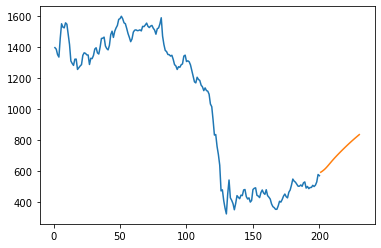

In [93]:
plt.plot(day_new,scaler.inverse_transform(df1[4358:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))